<h2> Import Libraries </h2>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pylab
from pylab import *
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 

#one hot encoding
from sklearn.preprocessing import OneHotEncoder

#Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#feature selection to remove low variance features
from sklearn.feature_selection import VarianceThreshold

#for PCA
from sklearn.decomposition import PCA

#model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import cohen_kappa_score

#cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

#Models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


%matplotlib inline
# Set default matplot figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

<h2> Load Train/Existing data (Dataset 1) Using Pandas </h2>

In [2]:
trainingDataOOB = pd.read_csv('trainingData.csv', header = 0)

<h2>Cleaning and Preprocessing</h2>

In [3]:
#check the first five rows of the data frame
trainingDataOOB.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [4]:
#column names
trainingDataOOB.columns

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP520', 'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object', length=529)

In [5]:
trainingDataOOB.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [6]:
trainingDataOOB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [7]:
trainingDataOOB.dropna(how='any')

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,100,100,100,100,100,100,100,100,100,100,...,100,-7485.4686,4.864875e+06,3,1,1,2,18,10,1371710683
19933,100,100,100,100,100,100,100,100,100,100,...,100,-7390.6206,4.864836e+06,1,2,140,2,18,10,1371710402
19934,100,100,100,100,100,100,100,100,100,100,...,100,-7516.8415,4.864889e+06,3,1,13,2,18,10,1371710921
19935,100,100,100,100,100,100,100,100,100,100,...,100,-7537.3219,4.864896e+06,3,1,113,2,18,10,1371711049


In [8]:
trainingDataOOB.isna()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19933,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19934,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19935,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<h2> Load Validation/New data (Dataset 2) Using Pandas </h2>

In [9]:
validationDataOOB = pd.read_csv('validationData.csv', header = 0)

In [10]:
#check the first five rows of the data frame
validationDataOOB.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,...,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,...,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,...,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774


In [11]:
#column names
validationDataOOB.columns

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP520', 'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object', length=529)

In [12]:
validationDataOOB.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,1111.000000,1111.0,1111.000000,1111.000000,1111.0,1111.0,1111.0,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1.111000e+03,1111.000000,1111.000000,1111.0,1111.0,1111.0,1111.000000,1.111000e+03
mean,98.627363,100.0,99.665167,99.665167,100.0,100.0,100.0,94.297030,90.655266,98.811881,...,99.843384,-7529.197448,4.864902e+06,1.571557,0.758776,0.0,0.0,0.0,11.923492,1.380604e+09
std,16.127245,0.0,7.888265,7.888607,0.0,0.0,0.0,32.148809,39.886991,14.931667,...,5.220261,120.209336,7.027280e+01,1.001828,0.816139,0.0,0.0,0.0,6.556236,5.003222e+05
min,-94.000000,100.0,-87.000000,-88.000000,100.0,100.0,100.0,-99.000000,-96.000000,-98.000000,...,-74.000000,-7695.938755,4.864748e+06,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.379578e+09
25%,100.000000,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,...,100.000000,-7637.423800,4.864843e+06,1.000000,0.000000,0.0,0.0,0.0,9.000000,1.380189e+09
50%,100.000000,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,...,100.000000,-7560.376300,4.864915e+06,1.000000,1.000000,0.0,0.0,0.0,13.000000,1.380873e+09
75%,100.000000,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,...,100.000000,-7420.539659,4.864967e+06,2.000000,1.000000,0.0,0.0,0.0,15.000000,1.380875e+09
max,100.000000,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,...,100.000000,-7299.786517,4.865017e+06,4.000000,2.000000,0.0,0.0,0.0,21.000000,1.381248e+09


In [13]:
validationDataOOB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 4.5 MB


In [14]:
validationDataOOB.dropna(how='any')

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,...,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,...,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,...,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,100,100,100,100,100,100,100,100,100,100,...,100,-7317.344231,4.864796e+06,3,2,0,0,0,13,1381156711
1107,100,100,100,100,100,100,100,100,100,100,...,100,-7313.731120,4.864792e+06,3,2,0,0,0,13,1381156730
1108,100,100,100,100,100,100,100,100,100,100,...,100,-7637.535798,4.864903e+06,0,0,0,0,0,13,1381247781
1109,100,100,100,100,100,100,100,100,100,100,...,100,-7636.654005,4.864905e+06,0,0,0,0,0,13,1381247807


In [15]:
validationDataOOB.isna()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1107,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1108,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1109,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<h2> Preprocess TrainingData Removing Columns and Feature Engineering </h2>

In [16]:
trainingPP = trainingDataOOB.copy(deep = True) #trainingPP == training preprocessed

</h4>don't need to normalize the data since the data is all the same scale
don't have categoricval predictor nor predicted valuez that need to 
be converted to binary (0,1) with the dummyVars function

drop unneeded columns</h4>

In [17]:
trainingPP.drop(['TIMESTAMP'], axis = 1, inplace = True)
trainingPP.drop(['USERID'], axis = 1, inplace = True)
trainingPP.drop(['PHONEID'], axis = 1, inplace = True)
trainingPP.drop(['RELATIVEPOSITION'], axis = 1, inplace = True)
trainingPP.drop(['LATITUDE'], axis = 1, inplace = True)
trainingPP.drop(['LONGITUDE'], axis = 1, inplace = True)
print(trainingPP)

       WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0         100     100     100     100     100     100     100     100     100   
1         100     100     100     100     100     100     100     100     100   
2         100     100     100     100     100     100     100     -97     100   
3         100     100     100     100     100     100     100     100     100   
4         100     100     100     100     100     100     100     100     100   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
19932     100     100     100     100     100     100     100     100     100   
19933     100     100     100     100     100     100     100     100     100   
19934     100     100     100     100     100     100     100     100     100   
19935     100     100     100     100     100     100     100     100     100   
19936     100     100     100     100     100     100     100     100     100   

       WAP010  ...  WAP514 

<h4>
Need to ENGINEER a predicted value by concatenating BUILDING, FLOOR, and SPACEID</h4>

In [18]:
trainingPP["label_location"] = trainingPP["FLOOR"] + trainingPP["BUILDINGID"] + trainingPP["SPACEID"]

<h4>drop buildingid, spaceid, and floor since i have a combined attribute now</h4>

In [19]:
trainingPP.drop(['FLOOR'], axis = 1, inplace = True)
trainingPP.drop(['BUILDINGID'], axis = 1, inplace = True)
trainingPP.drop(['SPACEID'], axis = 1, inplace = True)

In [20]:
print(trainingPP)

       WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0         100     100     100     100     100     100     100     100     100   
1         100     100     100     100     100     100     100     100     100   
2         100     100     100     100     100     100     100     -97     100   
3         100     100     100     100     100     100     100     100     100   
4         100     100     100     100     100     100     100     100     100   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
19932     100     100     100     100     100     100     100     100     100   
19933     100     100     100     100     100     100     100     100     100   
19934     100     100     100     100     100     100     100     100     100   
19935     100     100     100     100     100     100     100     100     100   
19936     100     100     100     100     100     100     100     100     100   

       WAP010  ...  WAP512 

<h4>write preprocessed dataset 1 to excel file</h4>

In [21]:
trainingPP.to_csv('trainingPP.csv', index=False, encoding='utf-8')

In [22]:
trainingPP

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,label_location
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,109
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,109
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,106
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,105
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,5
19933,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,143
19934,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,17
19935,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,117


<h2> Preprocess validataionData Removing Columns and Feature Engineering </h2>

In [23]:
validationPP = validationDataOOB.copy(deep = True) #trainingPP == training preprocessed

</h4>don't need to normalize the data since the data is all the same scale
don't have categoricval predictor nor predicted valuez that need to 
be converted to binary (0,1) with the dummyVars function

drop unneeded columns</h4>

In [24]:
validationPP.drop(['TIMESTAMP'], axis = 1, inplace = True)
validationPP.drop(['USERID'], axis = 1, inplace = True)
validationPP.drop(['PHONEID'], axis = 1, inplace = True)
validationPP.drop(['RELATIVEPOSITION'], axis = 1, inplace = True)
validationPP.drop(['LATITUDE'], axis = 1, inplace = True)
validationPP.drop(['LONGITUDE'], axis = 1, inplace = True)
print(validationPP)

      WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0        100     100     100     100     100     100     100     100     100   
1        100     100     100     100     100     100     100     100     100   
2        100     100     100     100     100     100     100     100     100   
3        100     100     100     100     100     100     100     100     100   
4        100     100     100     100     100     100     100     100     100   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1106     100     100     100     100     100     100     100     100     100   
1107     100     100     100     100     100     100     100     100     100   
1108     100     100     100     100     100     100     100     100     100   
1109     100     100     100     100     100     100     100     100     100   
1110     100     100     100     100     100     100     100     100     100   

      WAP010  ...  WAP514  WAP515  WAP5

<h4>
Need to ENGINEER a predicted value by concatenating BUILDING, FLOOR, and SPACEID</h4>

In [25]:
validationPP["label_location"] = validationPP["FLOOR"] + validationPP["BUILDINGID"] + validationPP["SPACEID"]

<h4>drop buildingid, spaceid, and floor since i have a combined attribute now</h4>

In [26]:
validationPP.drop(['FLOOR'], axis = 1, inplace = True)
validationPP.drop(['BUILDINGID'], axis = 1, inplace = True)
validationPP.drop(['SPACEID'], axis = 1, inplace = True)

<h4>write preprocessed dataset 2 to excel file</h4>

In [27]:
validationPP.to_csv('validationPP.csv', index=False, encoding='utf-8')

In [28]:
validationPP

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,label_location
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,2
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,6
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,6
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,6
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,5
1107,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,5
1108,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0
1109,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0


<h3> Training data and validation data is preprocessed</h3>

<h2> check for collinearity and correlation on training data</h2>

<h3>Covariance and Correlation Estimations</h3>
<h4>“Covariance” indicates the direction of the linear relationship between variables. “Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables. </h4>

In [29]:
covMat = trainingPP.cov()
print(covMat)

                   WAP001     WAP002  WAP003  WAP004     WAP005      WAP006  \
WAP001          34.419840  -0.031581     0.0     0.0  -0.068124   -0.506084   
WAP002          -0.031581  33.618617     0.0     0.0  -0.069170   -0.513857   
WAP003           0.000000   0.000000     0.0     0.0   0.000000    0.000000   
WAP004           0.000000   0.000000     0.0     0.0   0.000000    0.000000   
WAP005          -0.068124  -0.069170     0.0     0.0  74.229553   -1.108463   
...                   ...        ...     ...     ...        ...         ...   
WAP517          -7.074009  -7.182655     0.0     0.0  28.483416 -115.103550   
WAP518          -0.037277  -0.037850     0.0     0.0  -0.081648   -0.606553   
WAP519          -0.005201  -0.005281     0.0     0.0  -0.011393   -0.084635   
WAP520           0.000000   0.000000     0.0     0.0   0.000000    0.000000   
label_location   5.771860 -11.982397     0.0     0.0   3.511382 -191.181552   

                    WAP007      WAP008      WAP009 

In [30]:
covMat.to_excel (r'export_covMat_trainingPP.xlsx', index = True, header=True)

<h3>Correlation Estimations</h3>
<h4>Drop one of the two features where the correlation coefficient is greater than .95</h4>

In [31]:
print(trainingPP.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 521 entries, WAP001 to label_location
dtypes: int64(521)
memory usage: 79.2 MB
None


In [32]:
corrMat = trainingPP.corr()
print(corrMat)

                  WAP001    WAP002  WAP003  WAP004    WAP005    WAP006  \
WAP001          1.000000 -0.000928     NaN     NaN -0.001348 -0.003762   
WAP002         -0.000928  1.000000     NaN     NaN -0.001385 -0.003865   
WAP003               NaN       NaN     NaN     NaN       NaN       NaN   
WAP004               NaN       NaN     NaN     NaN       NaN       NaN   
WAP005         -0.001348 -0.001385     NaN     NaN  1.000000 -0.005610   
...                  ...       ...     ...     ...       ...       ...   
WAP517         -0.016281 -0.016727     NaN     NaN  0.044639 -0.067774   
WAP518         -0.000999 -0.001026     NaN     NaN -0.001490 -0.004158   
WAP519         -0.000369 -0.000379     NaN     NaN -0.000550 -0.001535   
WAP520               NaN       NaN     NaN     NaN       NaN       NaN   
label_location  0.016901 -0.035503     NaN     NaN  0.007002 -0.143224   

                  WAP007    WAP008    WAP009    WAP010  ...    WAP512  \
WAP001         -0.005184  0.004170 -0.

In [33]:
corrMat.to_excel (r'export_corrMat_trainingPP.xlsx', index = True, header=True)

<h4> Scale all features to ensure convergence in the SVM model</h4>

In [34]:
trainingPP_scaled = trainingPP.copy(deep = True)

In [35]:
trainingPP_scaled = StandardScaler().fit_transform(trainingPP_scaled.values)
print(trainingPP_scaled)

[[ 0.03006045  0.0308837   0.         ...  0.01226739  0.
  -0.72700774]
 [ 0.03006045  0.0308837   0.         ...  0.01226739  0.
  -0.72700774]
 [ 0.03006045  0.0308837   0.         ...  0.01226739  0.
  -0.77854743]
 ...
 [ 0.03006045  0.0308837   0.         ...  0.01226739  0.
  -2.30755833]
 [ 0.03006045  0.0308837   0.         ...  0.01226739  0.
  -0.58956856]
 [ 0.03006045  0.0308837   0.         ...  0.01226739  0.
  -0.60674845]]


In [36]:
trainingPP_scaled = pd.DataFrame(trainingPP_scaled, columns=trainingPP.columns)

In [37]:
print(trainingPP_scaled.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 521 entries, WAP001 to label_location
dtypes: float64(521)
memory usage: 79.2 MB
None


In [38]:
validationPP_scaled = validationPP.copy(deep = True)

In [39]:
validationPP_scaled = StandardScaler().fit_transform(validationPP_scaled.values)
print(validationPP_scaled)

[[ 0.08515127  0.          0.04246615 ...  0.          0.03001501
  -0.2402832 ]
 [ 0.08515127  0.          0.04246615 ...  0.          0.03001501
   2.66930407]
 [ 0.08515127  0.          0.04246615 ...  0.          0.03001501
   2.66930407]
 ...
 [ 0.08515127  0.          0.04246615 ...  0.          0.03001501
  -1.69507683]
 [ 0.08515127  0.          0.04246615 ...  0.          0.03001501
  -1.69507683]
 [ 0.08515127  0.          0.04246615 ...  0.          0.03001501
  -1.69507683]]


In [40]:
validationPP_scaled = pd.DataFrame(validationPP_scaled, columns=validationPP.columns)

In [41]:
print(validationPP_scaled.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Columns: 521 entries, WAP001 to label_location
dtypes: float64(521)
memory usage: 4.4 MB
None


In [42]:
validationPP_scaled.drop(columns=['label_location'])

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,0.085151,0.0,0.042466,0.042464,0.0,0.0,0.0,0.177473,0.234386,0.079606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030015
1,0.085151,0.0,0.042466,0.042464,0.0,0.0,0.0,0.177473,0.234386,0.079606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030015
2,0.085151,0.0,0.042466,0.042464,0.0,0.0,0.0,0.177473,0.234386,0.079606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030015
3,0.085151,0.0,0.042466,0.042464,0.0,0.0,0.0,0.177473,0.234386,0.079606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030015
4,0.085151,0.0,0.042466,0.042464,0.0,0.0,0.0,0.177473,0.234386,0.079606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,0.085151,0.0,0.042466,0.042464,0.0,0.0,0.0,0.177473,0.234386,0.079606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030015
1107,0.085151,0.0,0.042466,0.042464,0.0,0.0,0.0,0.177473,0.234386,0.079606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030015
1108,0.085151,0.0,0.042466,0.042464,0.0,0.0,0.0,0.177473,0.234386,0.079606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030015
1109,0.085151,0.0,0.042466,0.042464,0.0,0.0,0.0,0.177473,0.234386,0.079606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030015


<h2> convert label_location to categorical</h2>

<h4> for trainingPP_scaled</h4>

In [43]:
del trainingPP_scaled['label_location']

In [44]:
trainingPP_scaled['label_location'] = trainingPP['label_location'].astype(int)

In [45]:
print(trainingPP_scaled.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 521 entries, WAP001 to label_location
dtypes: float64(520), int32(1)
memory usage: 79.2 MB
None


In [46]:
trainingPP_scaled['label_location'] = pd.Categorical(trainingPP_scaled.label_location)
print(trainingPP_scaled.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 521 entries, WAP001 to label_location
dtypes: category(1), float64(520)
memory usage: 79.1 MB
None


In [47]:
print(trainingPP_scaled)

        WAP001    WAP002  WAP003  WAP004    WAP005    WAP006    WAP007  \
0      0.03006  0.030884     0.0     0.0  0.044834  0.125136  0.172437   
1      0.03006  0.030884     0.0     0.0  0.044834  0.125136  0.172437   
2      0.03006  0.030884     0.0     0.0  0.044834  0.125136  0.172437   
3      0.03006  0.030884     0.0     0.0  0.044834  0.125136  0.172437   
4      0.03006  0.030884     0.0     0.0  0.044834  0.125136  0.172437   
...        ...       ...     ...     ...       ...       ...       ...   
19932  0.03006  0.030884     0.0     0.0  0.044834  0.125136  0.172437   
19933  0.03006  0.030884     0.0     0.0  0.044834  0.125136  0.172437   
19934  0.03006  0.030884     0.0     0.0  0.044834  0.125136  0.172437   
19935  0.03006  0.030884     0.0     0.0  0.044834  0.125136  0.172437   
19936  0.03006  0.030884     0.0     0.0  0.044834  0.125136  0.172437   

         WAP008    WAP009    WAP010  ...    WAP512    WAP513    WAP514  \
0      0.187211  0.175093  0.066191  

In [48]:
del validationPP_scaled['label_location']

In [49]:
print(validationPP_scaled)

        WAP001  WAP002    WAP003    WAP004  WAP005  WAP006  WAP007    WAP008  \
0     0.085151     0.0  0.042466  0.042464     0.0     0.0     0.0  0.177473   
1     0.085151     0.0  0.042466  0.042464     0.0     0.0     0.0  0.177473   
2     0.085151     0.0  0.042466  0.042464     0.0     0.0     0.0  0.177473   
3     0.085151     0.0  0.042466  0.042464     0.0     0.0     0.0  0.177473   
4     0.085151     0.0  0.042466  0.042464     0.0     0.0     0.0  0.177473   
...        ...     ...       ...       ...     ...     ...     ...       ...   
1106  0.085151     0.0  0.042466  0.042464     0.0     0.0     0.0  0.177473   
1107  0.085151     0.0  0.042466  0.042464     0.0     0.0     0.0  0.177473   
1108  0.085151     0.0  0.042466  0.042464     0.0     0.0     0.0  0.177473   
1109  0.085151     0.0  0.042466  0.042464     0.0     0.0     0.0  0.177473   
1110  0.085151     0.0  0.042466  0.042464     0.0     0.0     0.0  0.177473   

        WAP009    WAP010  ...  WAP511  

In [50]:
#write validationPP_scaled to csv
validationPP_scaled.to_excel (r'validationPP_scaled.xlsx', index = False, header=True)

<h2>Start Classification Modeling</h2>
<h4>Setup features and depedant variables for modeling</h4>

<h4>No columns to dumify</h4>

<h4>Select the features columns</h4>

In [51]:
#features
features = trainingPP_scaled.iloc[:,0:520]
print('Summary of feature sample')
print(features)

Summary of feature sample
        WAP001    WAP002  WAP003  WAP004    WAP005    WAP006    WAP007  \
0      0.03006  0.030884     0.0     0.0  0.044834  0.125136  0.172437   
1      0.03006  0.030884     0.0     0.0  0.044834  0.125136  0.172437   
2      0.03006  0.030884     0.0     0.0  0.044834  0.125136  0.172437   
3      0.03006  0.030884     0.0     0.0  0.044834  0.125136  0.172437   
4      0.03006  0.030884     0.0     0.0  0.044834  0.125136  0.172437   
...        ...       ...     ...     ...       ...       ...       ...   
19932  0.03006  0.030884     0.0     0.0  0.044834  0.125136  0.172437   
19933  0.03006  0.030884     0.0     0.0  0.044834  0.125136  0.172437   
19934  0.03006  0.030884     0.0     0.0  0.044834  0.125136  0.172437   
19935  0.03006  0.030884     0.0     0.0  0.044834  0.125136  0.172437   
19936  0.03006  0.030884     0.0     0.0  0.044834  0.125136  0.172437   

         WAP008    WAP009    WAP010  ...   WAP511    WAP512    WAP513  \
0      0.187

<h4>Select the dependent columns</h4>

In [52]:
#dependent variable
depVar = trainingPP_scaled.iloc[:,520]
print(depVar)

0        109
1        109
2        106
3        105
4        122
        ... 
19932      5
19933    143
19934     17
19935    117
19936    116
Name: label_location, Length: 19937, dtype: category
Categories (132, int64): [2, 4, 5, 6, ..., 253, 255, 258, 259]


<h4>Define the training set (70%) and test set (30%)</h4>

In [53]:
X_train, X_test, y_train, y_test = train_test_split(features, depVar, test_size=0.30, random_state=5)

In [54]:
X_train.shape, X_test.shape

((13955, 520), (5982, 520))

In [55]:
y_train.shape,y_test.shape

((13955,), (5982,))

In [56]:
#define models and pass the training data to the models
#and run cross validation

crossvalidation = KFold(n_splits=5, shuffle = True, random_state = 1)
scorer = 'accuracy'

<h4> Random Forest Classifier </h4>

In [57]:
#Random Forest Classifier

modelRF = RandomForestClassifier(n_estimators=50, max_depth=2, random_state=0)
modelRF.fit(X_train, y_train)

cvRF = cross_val_score(modelRF, X_train, y_train, scoring = scorer, cv = crossvalidation)
print('cvRF (estimators = 300) accuracy score: %0.3f' % np.mean(cvRF))

cvRF (estimators = 300) accuracy score: 0.058


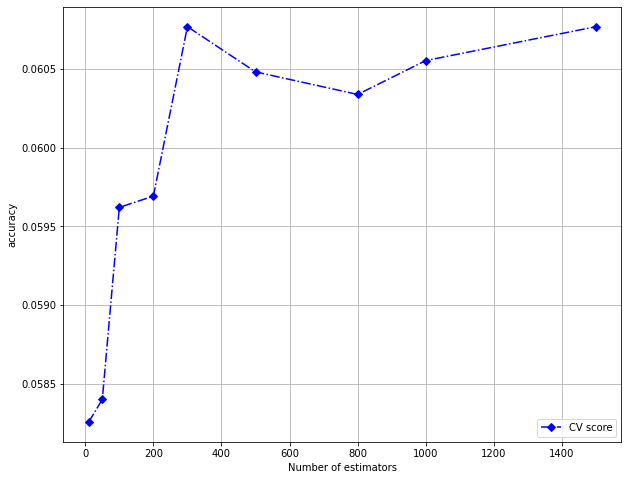

In [58]:
#the following verifies the impact the number of estimators has on the RFClassifier
#interestingly 50 estimators appears to produce the best results - set it to 50 above here to output the 
#cvRF accuracty score above

param_range = [10, 50, 100, 200, 300, 500, 800, 1000, 1500]
train_scores, test_scores = validation_curve(modelRF, X_train, y_train, 'n_estimators', param_range = param_range,
                                                                        cv=crossvalidation,
                                                                        scoring = 'accuracy')
mean_test_scores = np.mean(test_scores, axis=1)

plt.plot(param_range, mean_test_scores, 'bD-.', label = "CV score")
plt.grid()
plt.xlabel('Number of estimators')
plt.ylabel('accuracy')
plt.legend(loc = 'lower right', numpoints=1)
plt.show()

In [59]:
#knowing the 300 estimators appears to produce the best score with all other default parameters, we can now
#run a grid search on other parameters to estimate the best parameters and accuracy

max_features = [X_train.shape[1]//3, 'sqrt', 'log2', 'auto']
min_samples_leaf = [1, 10, 30]
n_estimators = [10, 50, 100, 200, 300, 500, 800, 1000, 1500]
search_grid = {'n_estimators':n_estimators,
                'max_features':max_features,
                 'min_samples_leaf':min_samples_leaf}
search_func = GridSearchCV(estimator = modelRF,
                          param_grid=search_grid,
                          scoring=scorer,
                          cv=crossvalidation)
search_func.fit(X_train,y_train)
best_params = search_func.best_params_
best_score = search_func.best_score_
print('Best parameters: %s' % best_params)
print('Best accuracy: %0.3f' % best_score)

Best parameters: {'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 10}
Best accuracy: 0.064


In [60]:
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 5000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

In [61]:
#so, rerun the model, train, and cv with:
#Best parameters: {'max_features': log2, 'min_samples_leaf': 1, 'n_estimators': 10}
# to get Best accuracy

modelRF = RandomForestClassifier(n_estimators=10, max_depth=2, min_samples_leaf = 1, max_features = 7, random_state=0)
modelRF.fit(X_train, y_train)

cvRF = cross_val_score(modelRF, X_train, y_train, scoring = scorer, cv = crossvalidation)
print('cvRF (estimators = 10, min_samples_leaf = 1, and max_features = 7) accuracy score: %0.3f' % np.mean(cvRF))

cvRF (estimators = 10, min_samples_leaf = 1, and max_features = 7) accuracy score: 0.060


<h4>KNearestNeighbors Classifier </h4>

In [62]:
modelKNN = KNeighborsClassifier(n_neighbors=20)
modelKNN.fit(X_train, y_train)

cvKNN = cross_val_score(modelKNN, X_train, y_train, scoring = 'accuracy', cv = crossvalidation)
print('cvKNN where k = ', 20, ' accuracy score: %0.3f' % np.mean(cvKNN))


cvKNN where k =  20  accuracy score: 0.383


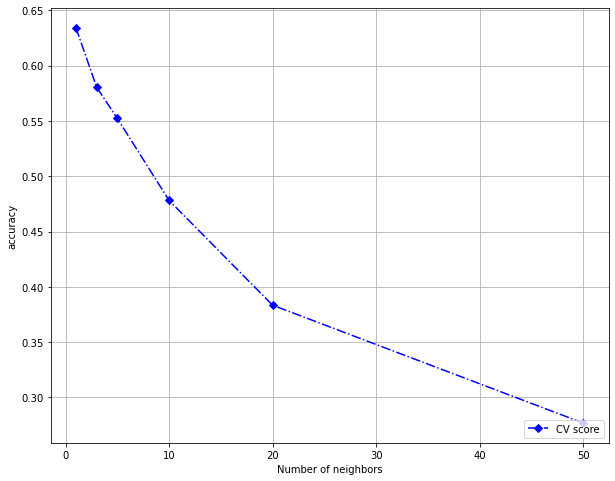

In [63]:
#the following verifies the impact the number of neighbors has on the KNN Classifier
#interestingly 20 estimators appears to produce the best results - set it to 20 above here to output the 
#KNN accuracty score above. Beyond 20 is a flattening of the curve and a limit to economies of scale - no real
#benefit to the additional compute time/cost

param_range = [1, 3, 5, 10, 20, 50]
train_scoresKNN, test_scoresKNN = validation_curve(modelKNN, X_train, y_train, 'n_neighbors', param_range = param_range,
                                                                        cv=crossvalidation,
                                                                        scoring = 'accuracy')

mean_test_scores = np.mean(test_scoresKNN, axis=1)

plt.plot(param_range, mean_test_scores, 'bD-.', label = "CV score")
plt.grid()
plt.xlabel('Number of neighbors')
plt.ylabel('accuracy')
plt.legend(loc = 'lower right', numpoints=1)
plt.show()


In [64]:
winsound.Beep(frequency, duration)

In [65]:
#knowing that k=1 appears to produce the best score with all other default parameters, we can now
#run a grid search on other parameters to estimate the best parameters and accuracy

weights = ['uniform', 'distance']
n_neighbors = [1, 10, 15, 20, 25, 30, 35]
search_grid = {'n_neighbors':n_neighbors,
                'weights':weights}
search_func = GridSearchCV(estimator = modelKNN,
                          param_grid=search_grid,
                          scoring=scorer,
                          cv=crossvalidation)
search_func.fit(X_train,y_train)
best_params = search_func.best_params_
best_score = search_func.best_score_
print('Best parameters: %s' % best_params)
print('Best accuracy: %0.3f' % best_score)

#Best parameters: {'n_neighbors': 1, 'weights': 'uniform'}
#Best accuracy: 0.648

Best parameters: {'n_neighbors': 1, 'weights': 'uniform'}
Best accuracy: 0.634


In [66]:
winsound.Beep(frequency, duration)

<h4>Support Vector Machine</h4>

In [67]:
modelSVM = SVC(kernel = 'rbf', gamma = 'auto')

cvSVM = cross_val_score(modelSVM, X_train, y_train, scoring = scorer, cv = crossvalidation)
test_scoreSVM = modelSVM.fit(X_train, y_train).score(X_test,y_test)
print('cvSVM accuracy score using default values: %0.3f' % np.mean(cvSVM))
print('TestSVM accuracy score using default values: %0.3f' % np.mean(test_scoreSVM))

print('\n')

#cvSVM accuracy score using default values: 0.458
#TestSVM accuracy score using default values: 0.507

cvSVM accuracy score using default values: 0.458
TestSVM accuracy score using default values: 0.507




In [68]:
winsound.Beep(frequency, duration)

In [69]:
#search for an optimal C AND loss str AND penalty str
search_space = {'C': np.logspace(3,7, 10, 50),
               'kernel':['rbf']}
gridsearch = GridSearchCV (modelSVM,
                          param_grid=search_space,
                          scoring= scorer,
                          refit=True,
                          cv=crossvalidation)

import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    gridsearch.fit(X_train,y_train)

cvSVM = gridsearch.best_score_
test_scoreSVM = gridsearch.score(X_test,y_test)

print('--Using GridSearch to find optimal C value--')
print('\n')
print('cvSVM accuracy score: %0.3f' % cvSVM)
print('TestSVM accuracy score: %0.3f' % test_scoreSVM)
print('Best parameters: %s' % gridsearch.best_params_)

#cvSVM accuracy score: 0.622
#TestSVM accuracy score: 0.648
#Best parameters: {'C': 1000.0, 'kernel': 'rbf'}

--Using GridSearch to find optimal C value--


cvSVM accuracy score: 0.622
TestSVM accuracy score: 0.648
Best parameters: {'C': 1000.0, 'kernel': 'rbf'}


In [70]:
winsound.Beep(frequency, duration)

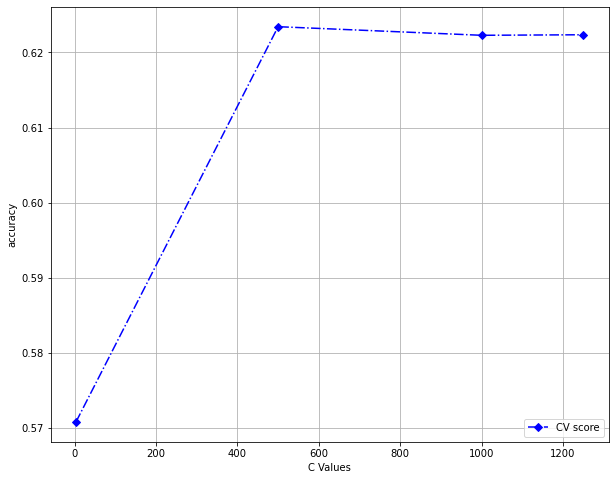

In [71]:
#the following verifies the impact the number of neighbors has on the SCV Classifier
#interestingly C = 1000 appears to produce the best results - set it to 1000 above here to output the 
#SVC accuracty score above. 

param_range = [3,500, 1000, 1250]
train_scoresSVM, test_scoresSVM = validation_curve(modelSVM, X_train, y_train, 'C', param_range = param_range,
                                                                        cv=crossvalidation,
                                                                        scoring = 'accuracy')

mean_test_scores = np.mean(test_scoresSVM, axis=1)

plt.plot(param_range, mean_test_scores, 'bD-.', label = "CV score")
plt.grid()
plt.xlabel('C Values')
plt.ylabel('accuracy')
plt.legend(loc = 'lower right', numpoints=1)
plt.show()

In [72]:
winsound.Beep(frequency, duration)

<h2> Summary of Model Perfomance </h2>

<h4> 
    RF model <br><br>
Best parameters: {'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 10} <br>
Best accuracy: 0.064 <br></h4>
<h4>    
    KNN model <br><br>
Best parameters: {'n_neighbors': 1, 'weights': 'uniform'} <br>
Best accuracy: 0.634 <br></h4>
<h4>    
    SVM model <br><br>
Best parameters: {'C': 1000.0, 'kernel': 'rbf'} <br>
Best accuracy: 0.622 </h4>

<h2> Cohens Kappa Coefficient </h2>

In [73]:
#create SVM Kappa Score
modelSVM = SVC(kernel = 'rbf', gamma = 'auto', C = 1000)
modelSVM.fit(X_test, y_test)
y_pred = modelSVM.predict(X_test)

cohen_kappa_score(y_test, y_pred)

0.961755232321351

In [74]:
#create KNN Kappa score
modelKNN = KNeighborsClassifier(n_neighbors=1, weights = 'uniform')
modelKNN.fit(X_test, y_test)
y_pred = modelKNN.predict(X_test)

cohen_kappa_score(y_test, y_pred)

0.9712335330547338

In [75]:
#create RF Kappa score
modelRF = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0, max_features = 'log2', min_samples_leaf = 1)
modelRF.fit(X_test, y_test)
y_pred = modelKNN.predict(X_test)

cohen_kappa_score(y_test, y_pred)

0.9712335330547338

<h2> Make Predictions with Best Performing Model = RandomForestClassifier </h2>

In [77]:
#modelRF has the best outcome, so make the final prediction with the modelRF

#Predict with RF
#print(validationPP_scaled)
predSVM = modelSVM.predict(validationPP_scaled)
print(predSVM)

[216 107 117 ... 205 212 205]


In [78]:
#add the predRF array to the validationData.csv as new column
validationDataOOB['location_prediction']=pd.Series(predSVM)
print(validationDataOOB)
#write validationData plus prediction column to excel
validationDataOOB.to_excel (r'validationDataOOBwithPredictedLocation.xlsx', index = False, header=True)

      WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0        100     100     100     100     100     100     100     100     100   
1        100     100     100     100     100     100     100     100     100   
2        100     100     100     100     100     100     100     100     100   
3        100     100     100     100     100     100     100     100     100   
4        100     100     100     100     100     100     100     100     100   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1106     100     100     100     100     100     100     100     100     100   
1107     100     100     100     100     100     100     100     100     100   
1108     100     100     100     100     100     100     100     100     100   
1109     100     100     100     100     100     100     100     100     100   
1110     100     100     100     100     100     100     100     100     100   

      WAP010  ...    LONGITUDE      LAT